In [1]:
# 1. Data Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns

# Load the diamonds dataset from seaborn
df = sns.load_dataset('diamonds')
print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())

# Remove rows where x, y, or z is zero (invalid dimensions)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# Check for any missing values (should be none in this dataset)
print("Missing values after cleaning:\n", df.isnull().sum())

# Encode ordinal categorical features: cut, color, clarity
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut'] = df['cut'].map(cut_mapping).astype(int)

color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df['color'] = df['color'].map(color_mapping).astype(int)

clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(clarity_mapping).astype(int)

print("After encoding, sample data:")
print(df[['carat','cut','color','clarity','x','y','z']].head())

Initial shape: (53940, 10)
Columns: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Missing values after cleaning:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
After encoding, sample data:
   carat  cut  color  clarity     x     y     z
0   0.23    5      6        2  3.95  3.98  2.43
1   0.21    4      6        3  3.89  3.84  2.31
2   0.23    2      6        5  4.05  4.07  2.31
3   0.29    4      2        4  4.20  4.23  2.63
4   0.31    2      1        2  4.34  4.35  2.75


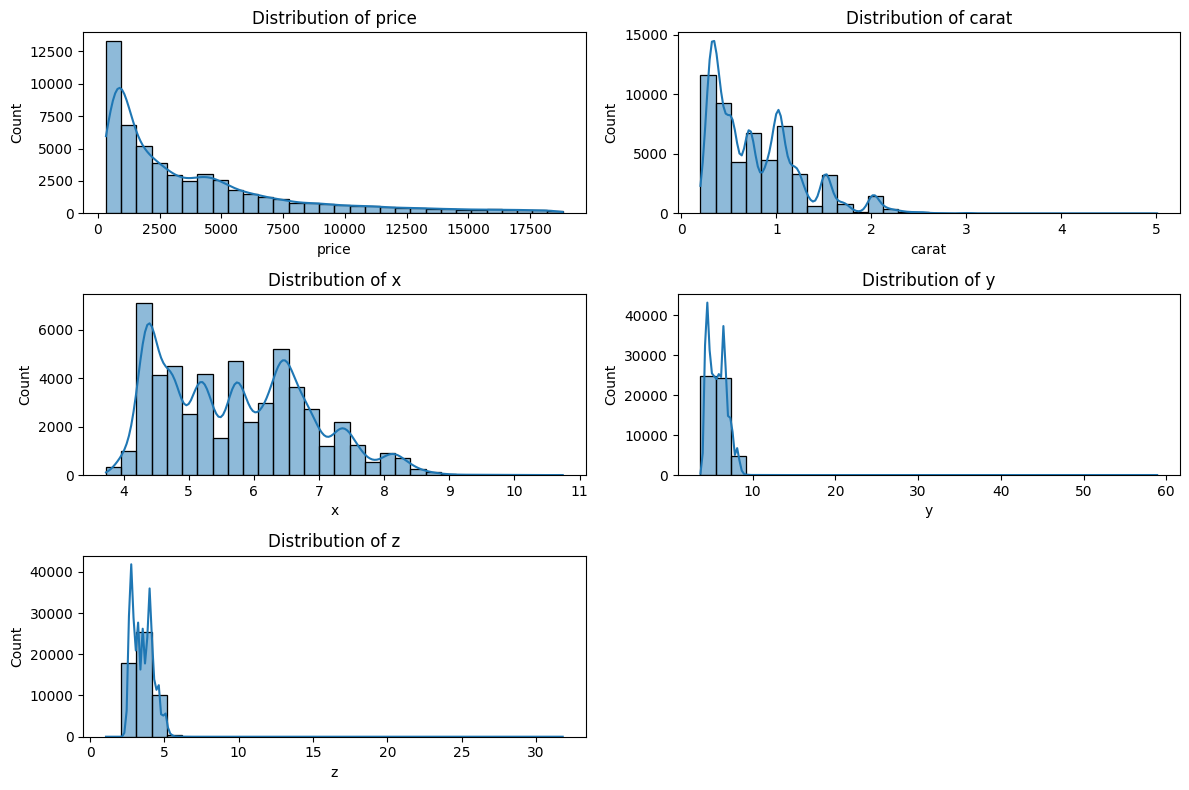

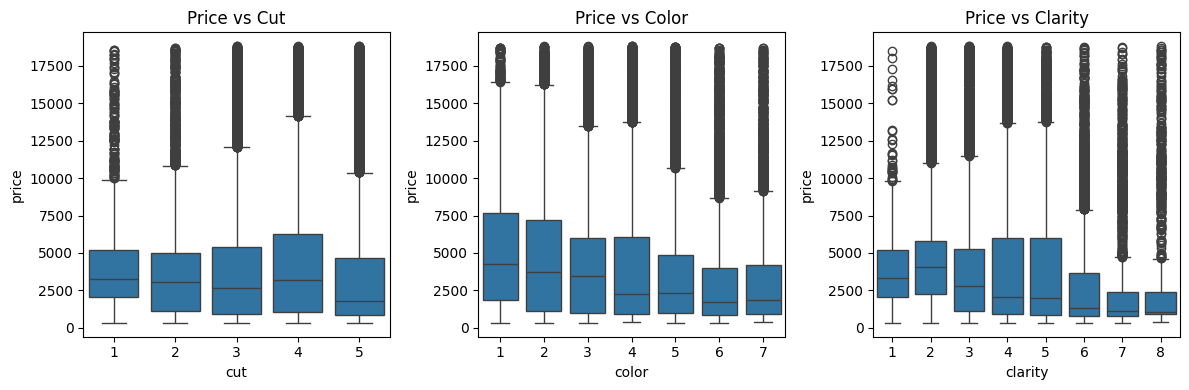

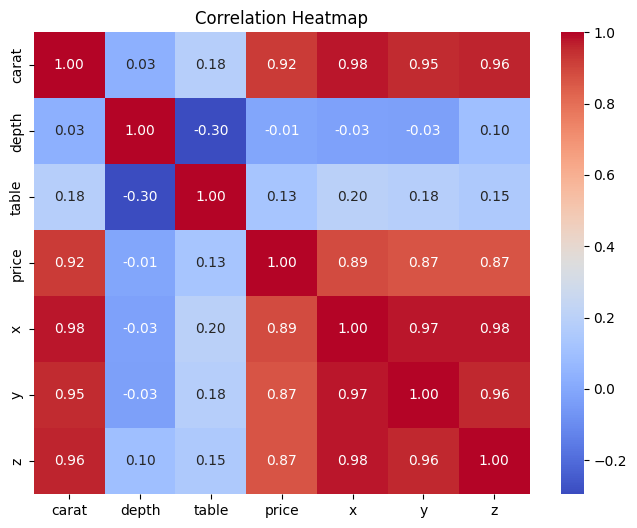

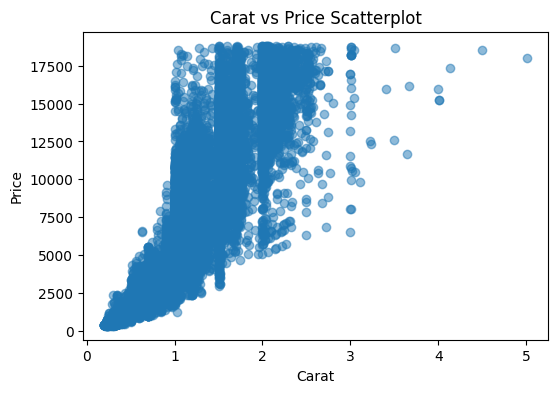

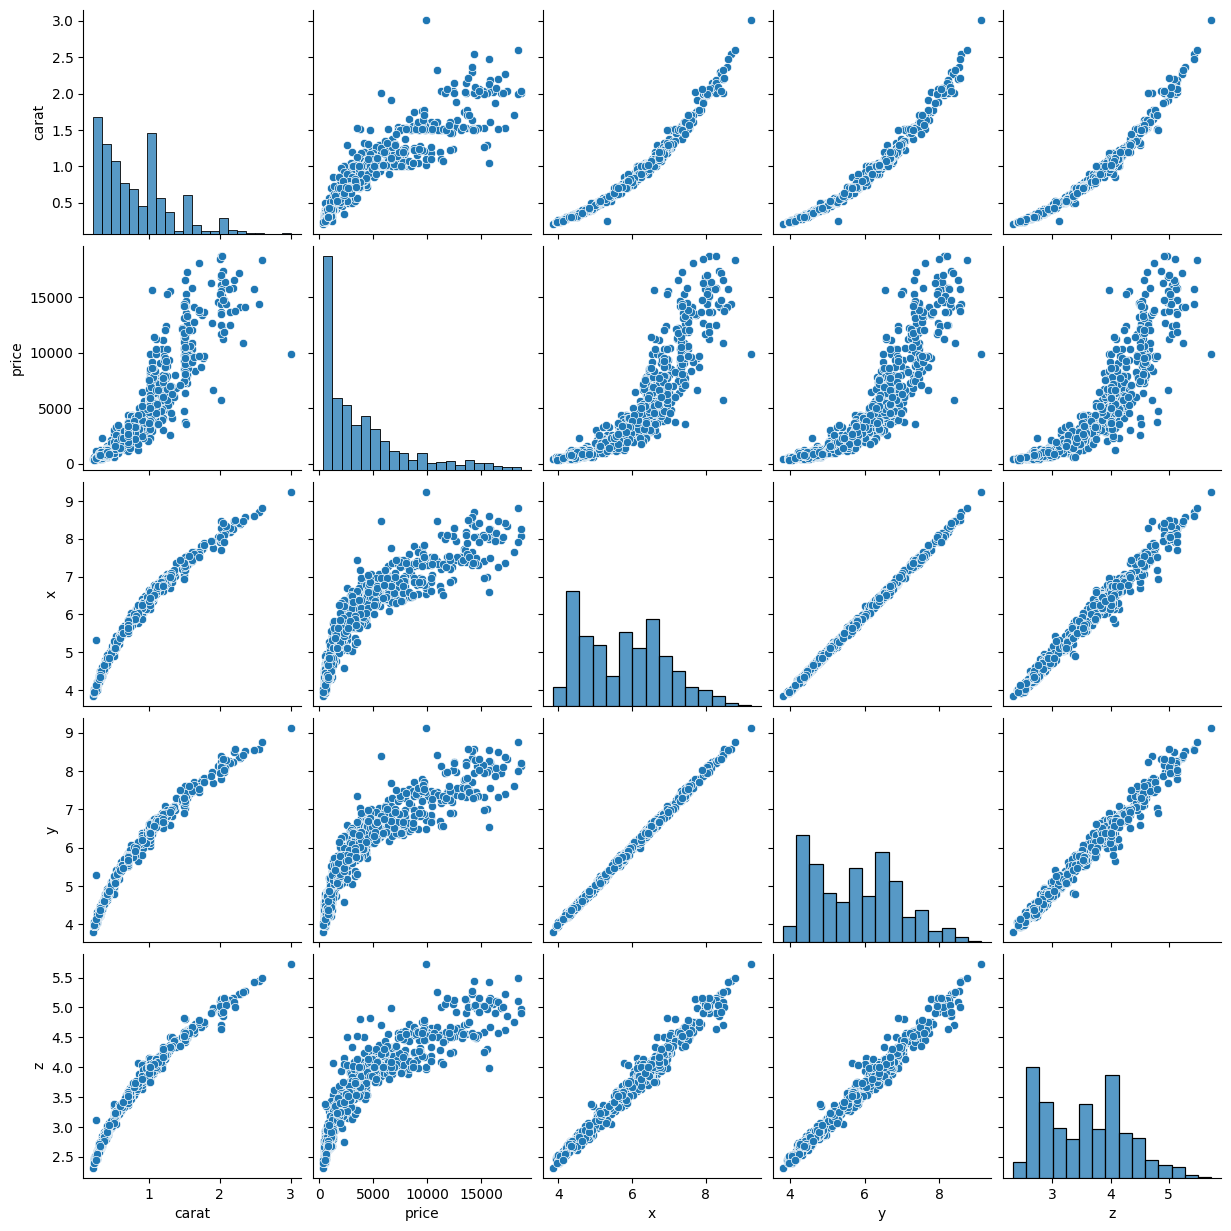

In [2]:
# 2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

# Distribution plots for price, carat, x, y, z
plt.figure(figsize=(12, 8))
for idx, col in enumerate(['price', 'carat', 'x', 'y', 'z'], 1):
    plt.subplot(3, 2, idx)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots of price across categorical features: cut, color, clarity
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price vs Cut')

plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=df)
plt.title('Price vs Color')

plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price vs Clarity')
plt.tight_layout()
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(8, 6))
corr = df[['carat','depth','table','price','x','y','z']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: carat vs price
plt.figure(figsize=(6, 4))
plt.scatter(df['carat'], df['price'], alpha=0.5)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price Scatterplot')
plt.show()

# Pair plot for selected features (using a sample for performance)
sns.pairplot(df[['carat','price','x','y','z']].sample(n=1000, random_state=1))
plt.show()

In [3]:
# 3. Feature Engineering

# Volume of the diamond (in cubic mm)
df['Volume'] = df['x'] * df['y'] * df['z']

# Price per carat
df['Price_per_Carat'] = df['price'] / df['carat']

# Dimension Ratio
df['Dimension_Ratio'] = (df['x'] + df['y']) / (2 * df['z'])

# Carat Category: Light (<0.5), Medium (0.5-1.5), Heavy (>1.5)
def carat_category(carat):
    if carat < 0.5:
        return 'Light'
    elif carat < 1.5:
        return 'Medium'
    else:
        return 'Heavy'

df['Carat_Category'] = df['carat'].apply(carat_category)

# Convert price to INR (1 USD = 83 INR)
conversion_rate = 83
df['Price_INR'] = df['price'] * conversion_rate

print("New features added. Sample:")
print(df[['Volume','Price_per_Carat','Dimension_Ratio','Carat_Category','Price_INR']].head())



New features added. Sample:
      Volume  Price_per_Carat  Dimension_Ratio Carat_Category  Price_INR
0  38.202030      1417.391304         1.631687          Light      27058
1  34.505856      1552.380952         1.673160          Light      27058
2  38.076885      1421.739130         1.757576          Light      27141
3  46.724580      1151.724138         1.602662          Light      27722
4  51.917250      1080.645161         1.580000          Light      27805


In [4]:
# 3. Outlier and Skewness Handling

# Remove outliers using IQR for 'price' and 'carat'
for col in ['price', 'carat']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Feature Engineering
# Volume of the diamond (in cubic mm)
df['Volume'] = df['x'] * df['y'] * df['z']

# Price per carat
df['Price_per_Carat'] = df['price'] / df['carat']

# Dimension Ratio
df['Dimension_Ratio'] = (df['x'] + df['y']) / (2 * df['z'])

# Carat Category: Light (<0.5), Medium (0.5-1.5), Heavy (>1.5)
def carat_category(carat):
    if carat < 0.5:
        return 'Light'
    elif carat < 1.5:
        return 'Medium'
    else:
        return 'Heavy'

df['Carat_Category'] = df['carat'].apply(carat_category)

# Convert price to INR (1 USD = 83 INR)
conversion_rate = 83
df['Price_INR'] = df['price'] * conversion_rate

print("New features added. Sample:")
print(df[['Volume','Dimension_Ratio','Carat_Category','Price_INR']].head())

# Show skewness before log transform
print("Skewness before log transform:")
print(df[['price','carat','x','y','z']].skew())

# Apply log1p transform to reduce skew (log(1+x))
for col in ['price','carat','x','y','z']:
    df[f'log_{col}'] = np.log1p(df[col])

print("Skewness after log transform:")
print(df[['log_price','log_carat','log_x','log_y','log_z']].skew())

New features added. Sample:
      Volume  Dimension_Ratio Carat_Category  Price_INR
0  38.202030         1.631687          Light      27058
1  34.505856         1.673160          Light      27058
2  38.076885         1.757576          Light      27141
3  46.724580         1.602662          Light      27722
4  51.917250         1.580000          Light      27805
Skewness before log transform:
price    1.193712
carat    0.643658
x        0.213611
y        0.589702
z        2.127967
dtype: float64
Skewness after log transform:
log_price    0.040790
log_carat    0.357358
log_x        0.038131
log_y        0.061652
log_z        0.107855
dtype: float64


In [5]:
# 5. Model Building – Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Create /tmp directory if it doesn't exist
os.makedirs('/tmp', exist_ok=True)

# Features and target
X = df[['carat','cut','color','clarity','depth','table','x','y','z',
        'Volume','Dimension_Ratio']]
y = df['price']  # target: price in USD

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (useful for KNN, ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper to train and evaluate a model
def evaluate_model(name, model, X_tr, X_te):
    model.fit(X_tr, y_train)
    preds = model.predict(X_te)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"{name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return r2

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    if name == 'KNN':
        evaluate_model(name, model, X_train_scaled, X_test_scaled)
    else:
        evaluate_model(name, model, X_train, X_test)

# Build and evaluate a simple ANN using TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)

y_pred_ann = ann.predict(X_test_scaled)
ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_mse = mean_squared_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, y_pred_ann)
print(f"ANN -> MAE: {ann_mae:.2f}, MSE: {ann_mse:.2f}, RMSE: {ann_rmse:.2f}, R²: {ann_r2:.2f}")

# Save best-performing regression model (e.g., Random Forest) to /tmp
import pickle
best_model = RandomForestRegressor(random_state=42, n_estimators=100)
best_model.fit(X_train, y_train)
with open('/tmp/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Linear Regression -> MAE: 559.31, MSE: 643356.11, RMSE: 802.09, R²: 0.91
Decision Tree -> MAE: 265.52, MSE: 246081.46, RMSE: 496.07, R²: 0.97
Random Forest -> MAE: 198.15, MSE: 128239.86, RMSE: 358.11, R²: 0.98
XGBoost -> MAE: 207.44, MSE: 130760.63, RMSE: 361.61, R²: 0.98
KNN -> MAE: 274.99, MSE: 215395.54, RMSE: 464.11, R²: 0.97


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN -> MAE: 306.49, MSE: 241606.50, RMSE: 491.53, R²: 0.97


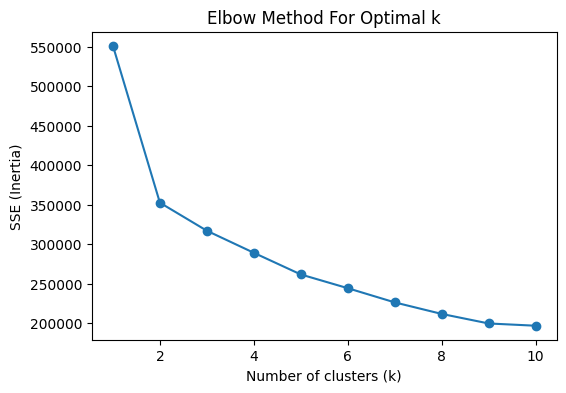

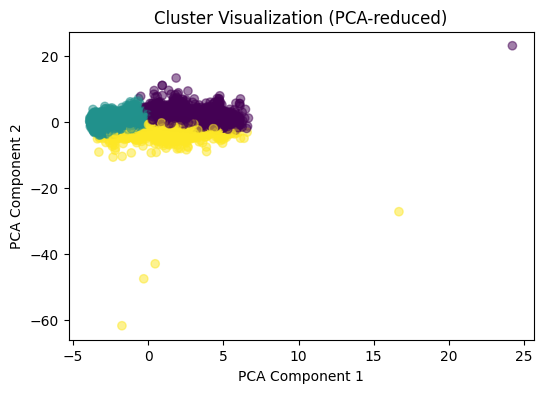

In [6]:
# 6. Model Building – Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

# Create /tmp directory if it doesn't exist
os.makedirs('/tmp', exist_ok=True)

# Prepare features for clustering (exclude price and Price_per_Carat)
cluster_features = df[['carat','cut','color','clarity','depth','table','x','y','z','Volume','Dimension_Ratio']]

# Standardize features
cluster_scaler = StandardScaler()
cluster_scaled = cluster_scaler.fit_transform(cluster_features)

# Elbow method to find optimal k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    sse.append(km.inertia_)

# Plot Elbow curve (optional)
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with chosen k (e.g., k=3)
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

# (Optional) PCA for 2D cluster visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_scaled)
plt.figure(figsize=(6,4))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (PCA-reduced)')
plt.show()

# Save the clustering model and scaler to /tmp
with open('/tmp/cluster_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('/tmp/cluster_scaler.pkl', 'wb') as f:
    pickle.dump(cluster_scaler, f)

In [7]:
!pip install streamlit streamlit_option_menu  # installing streamlit and streamlit_option_menu packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.5 MB/s eta 0:00:00


In [8]:

# my file name is app.py you can change it to anything you want


%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os

# Define the path to the saved models
model_path = '/tmp/'

# Load trained models
try:
    with open(os.path.join(model_path, 'best_model.pkl'), 'rb') as f:
        best_model = pickle.load(f)
    with open(os.path.join(model_path, 'cluster_model.pkl'), 'rb') as f:
        cluster_model = pickle.load(f)
    with open(os.path.join(model_path, 'cluster_scaler.pkl'), 'rb') as f:
        cluster_scaler = pickle.load(f)
except FileNotFoundError:
    st.error("Model files not found. Please run the model training cells first.")
    st.stop()


st.title("Diamond Price Prediction and Market Segmentation")

# Input fields for diamond attributes
carat = st.number_input("Carat", min_value=0.0, format="%f")
cut = st.selectbox("Cut", ["Fair", "Good", "Very Good", "Premium", "Ideal"])
color = st.selectbox("Color", ["J", "I", "H", "G", "F", "E", "D"])
clarity = st.selectbox("Clarity", ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
depth = st.number_input("Depth", min_value=0.0, format="%f")
table = st.number_input("Table", min_value=0.0, format="%f")
x = st.number_input("Length (x)", min_value=0.0, format="%f")
y = st.number_input("Width (y)", min_value=0.0, format="%f")
z = st.number_input("Depth (z)", min_value=0.0, format="%f")

if st.button("Predict"):
    # Map categorical inputs to numeric (same mapping as training)
    cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
    color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
    clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
    cut_val = cut_map[cut]
    color_val = color_map[color]
    clarity_val = clarity_map[clarity]

    # Prepare input DataFrame
    input_df = pd.DataFrame({
        'carat': [carat], 'cut': [cut_val], 'color': [color_val], 'clarity': [clarity_val],
        'depth': [depth], 'table': [table], 'x': [x], 'y': [y], 'z': [z]
    })
    # Compute engineered features
    input_df['Volume'] = input_df['x'] * input_df['y'] * input_df['z']
    input_df['Dimension_Ratio'] = (input_df['x'] + input_df['y']) / (2 * input_df['z'])

    # Predict price (USD) and convert to INR
    price_pred = best_model.predict(input_df)[0]
    price_pred_inr = price_pred * 83

    # Prepare features for clustering (same order as training)
    cluster_input = input_df.copy()
    cluster_scaled_input = cluster_scaler.transform(cluster_input[['carat','cut','color','clarity',
                                                                   'depth','table','x','y','z',
                                                                   'Volume','Dimension_Ratio']])
    cluster_label = cluster_model.predict(cluster_scaled_input)[0]

    st.write(f"**Predicted Price (USD):** {price_pred:.2f}")
    st.write(f"**Predicted Price (INR):** {price_pred_inr:.2f}")
    st.write(f"**Predicted Cluster:** {cluster_label}")

Writing app.py


In [9]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-10-11 13:55:40--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64 [following]
--2025-10-11 13:55:40--  https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/e30ab3bb-4e6a-464a-8db5-d5cabe6a2f8d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-11T14%3A53%3A09Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-11T1

In [10]:
!streamlit run /content/app.py &>/content/logs.txt &  # here instead of app.py please rename with your file name

In [11]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://containing-brighton-payments-practitioners.trycloudflare.com
